In [1]:
# pip install tensorflow

In [2]:
# pip install keras

In [3]:
import os

# Print the current working directory to ensure it's correct
print("Current working directory:", os.getcwd())

# Configuration section for paths (relative to the current working directory)
script_dir = os.getcwd()

train_files_healthy = os.path.join(script_dir, "Dataset/Train/Healthy")
train_files_powdery = os.path.join(script_dir, "Dataset/Train/Powdery")
train_files_rust = os.path.join(script_dir, "Dataset/Train/Rust")

test_files_healthy = os.path.join(script_dir, "Dataset/Test/Healthy")
test_files_powdery = os.path.join(script_dir, "Dataset/Test/Powdery")
test_files_rust = os.path.join(script_dir, "Dataset/Test/Rust")

valid_files_healthy = os.path.join(script_dir, "Dataset/Validation/Healthy")
valid_files_powdery = os.path.join(script_dir, "Dataset/Validation/Powdery")
valid_files_rust = os.path.join(script_dir, "Dataset/Validation/Rust")

# Function to count total files in a directory
def total_files(folder_path):
    if not os.path.exists(folder_path):
        return f"Path does not exist: {folder_path}"
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

# Checking and printing the number of files
print("Number of healthy leaf images in training set:", total_files(train_files_healthy))
print("Number of powdery leaf images in training set:", total_files(train_files_powdery))
print("Number of rusty leaf images in training set:", total_files(train_files_rust))

print("========================================================")

print("Number of healthy leaf images in test set:", total_files(test_files_healthy))
print("Number of powdery leaf images in test sethiiii:", total_files(test_files_powdery))
print("Number of rusty leaf images in test set:", total_files(test_files_rust))

print("========================================================")

print("Number of healthy leaf images in validation sete:", total_files(valid_files_healthy))
print("Number of powdery leaf images in validation set:", total_files(valid_files_powdery))
print("Number of rusty leaf images in validation set:", total_files(valid_files_rust))

Current working directory: c:\Users\Mamatha TL\Desktop\Tharun\6th sem notes\CGIP\CG Project\CG Mini Project\plant_disease_detection-main
Number of healthy leaf images in training set: 458
Number of powdery leaf images in training set: 430
Number of rusty leaf images in training set: 434
Number of healthy leaf images in test set: 50
Number of powdery leaf images in test sethiiii: 50
Number of rusty leaf images in test set: 50
Number of healthy leaf images in validation sete: 20
Number of powdery leaf images in validation set: 20
Number of rusty leaf images in validation set: 20


In [4]:
#!pip install PIL

In [5]:
#pip install pillow

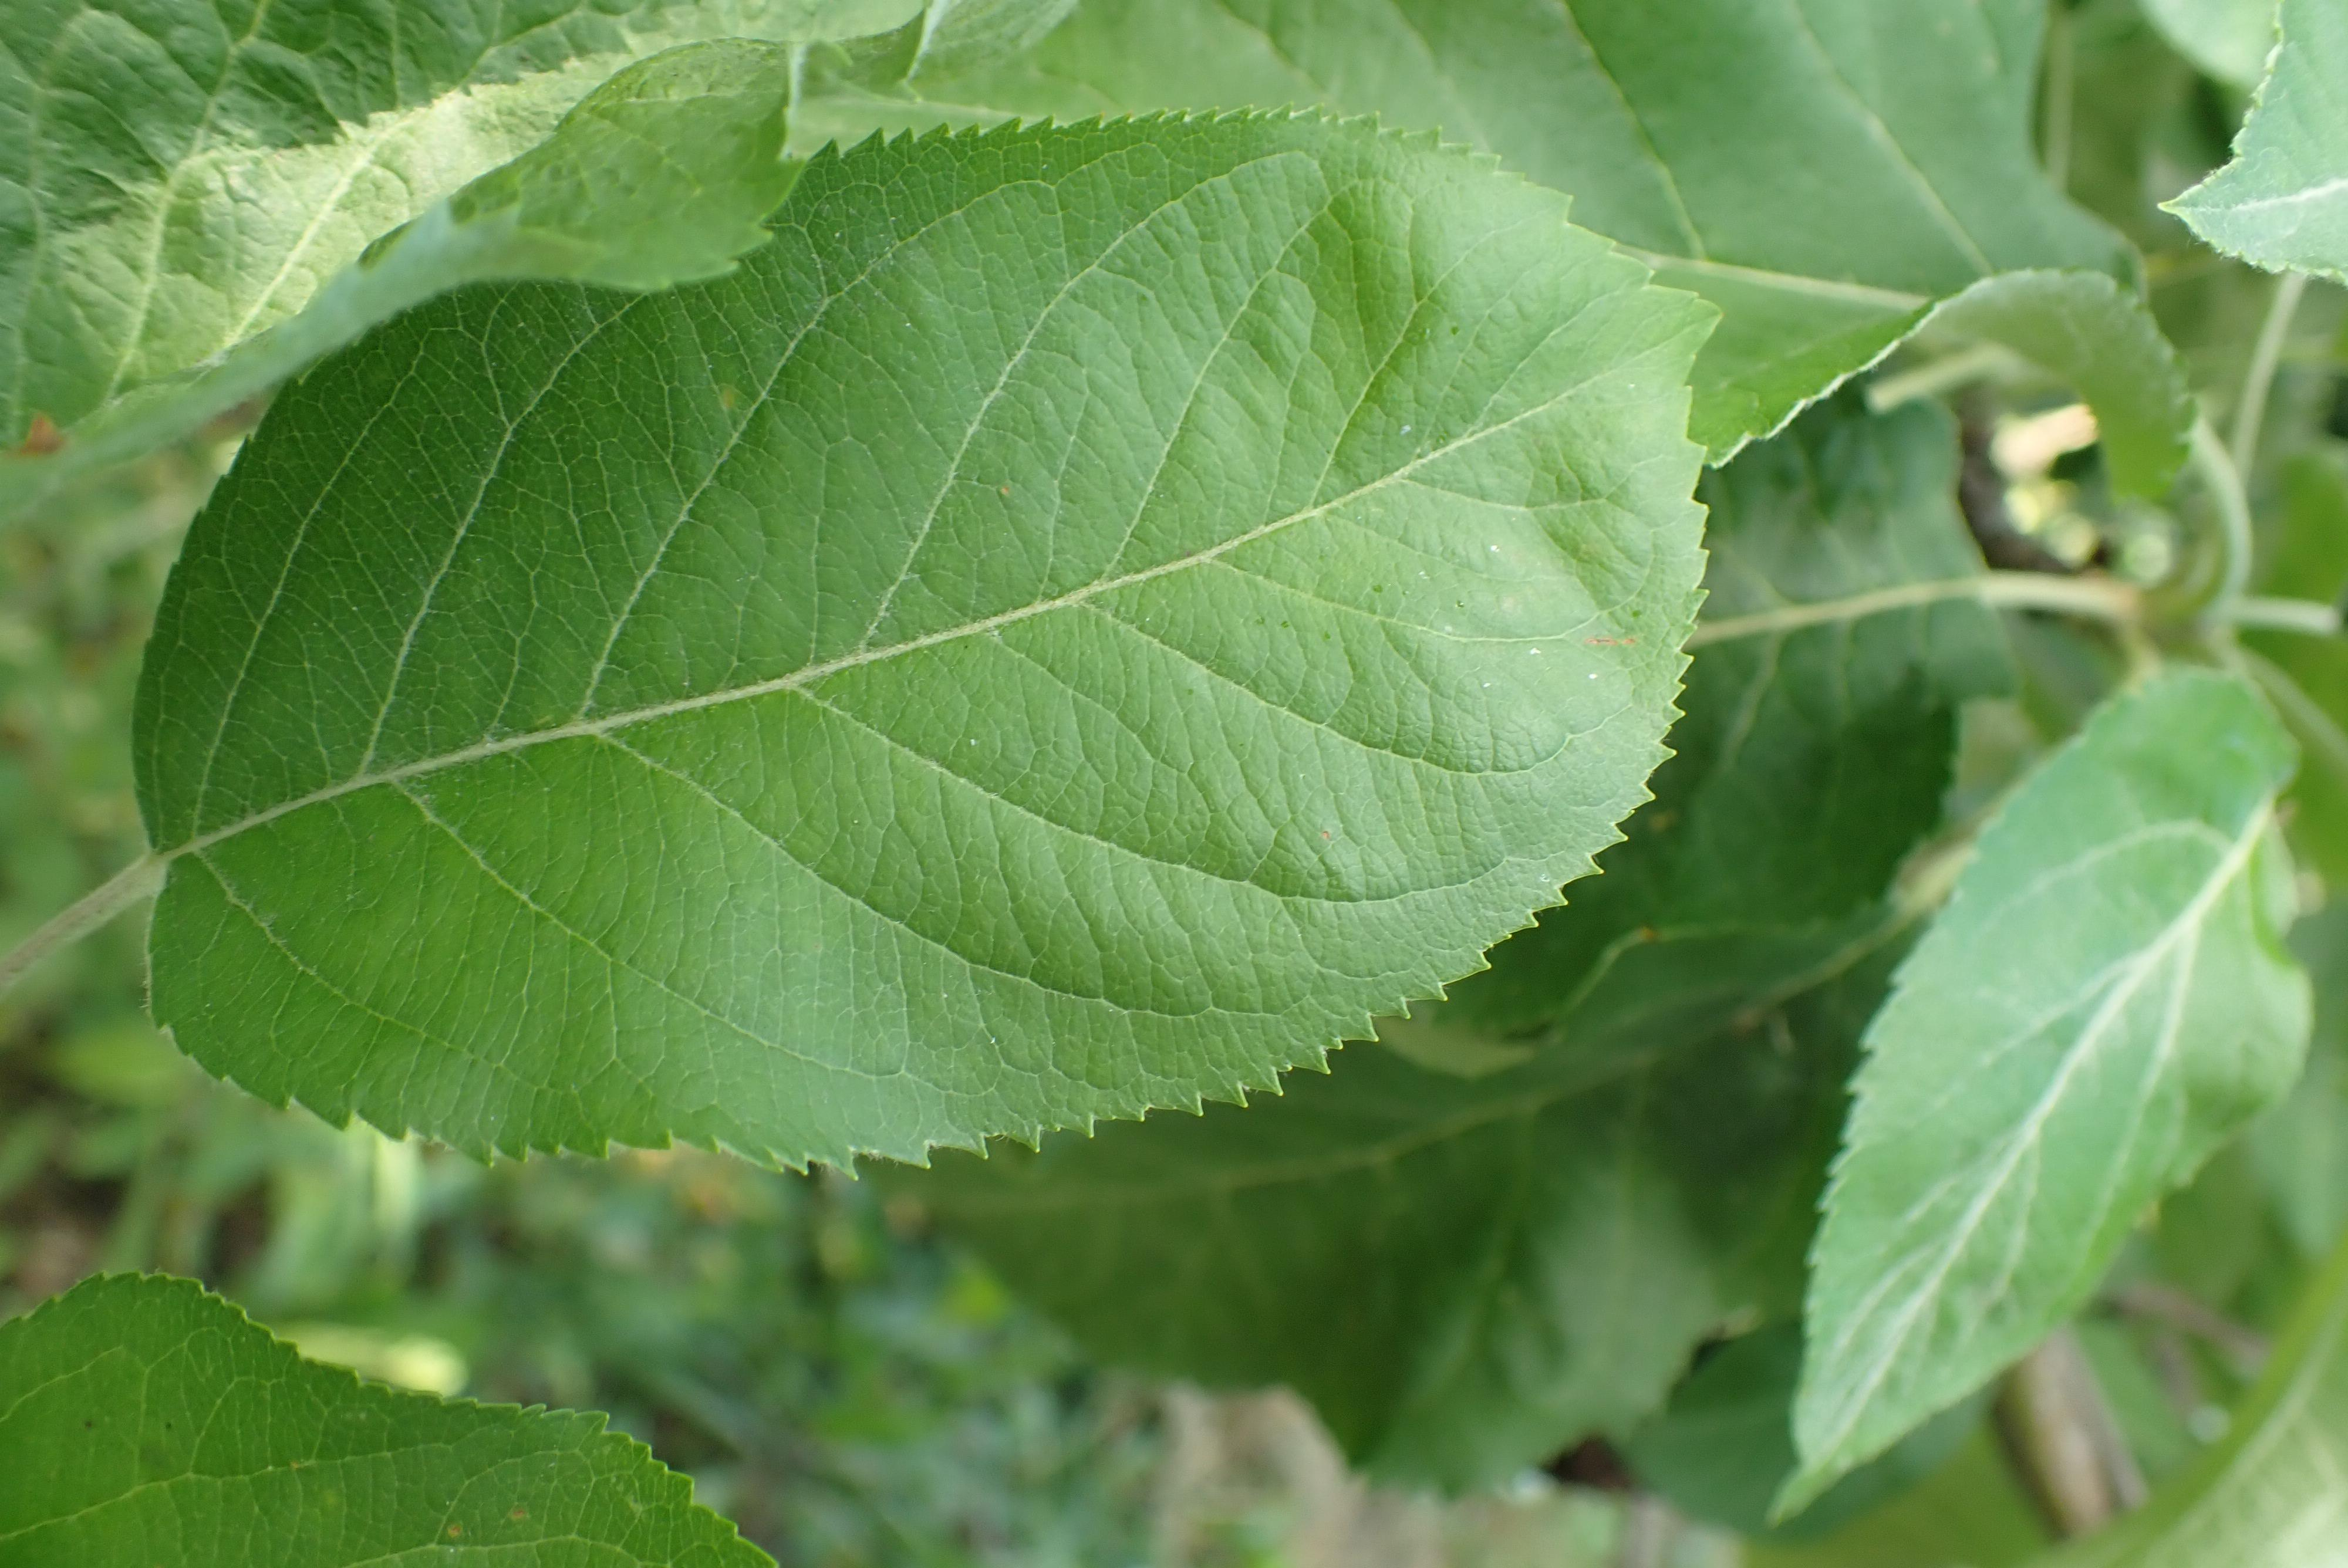

In [6]:
from PIL import Image
import IPython.display as display

image_path = r"C:\Users\Mamatha TL\Desktop\Tharun\6th sem notes\CGIP\CG Project\CG Mini Project\plant_disease_detection-main\Dataset\Train\Healthy\8bda74e18b458f0d.jpg"

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

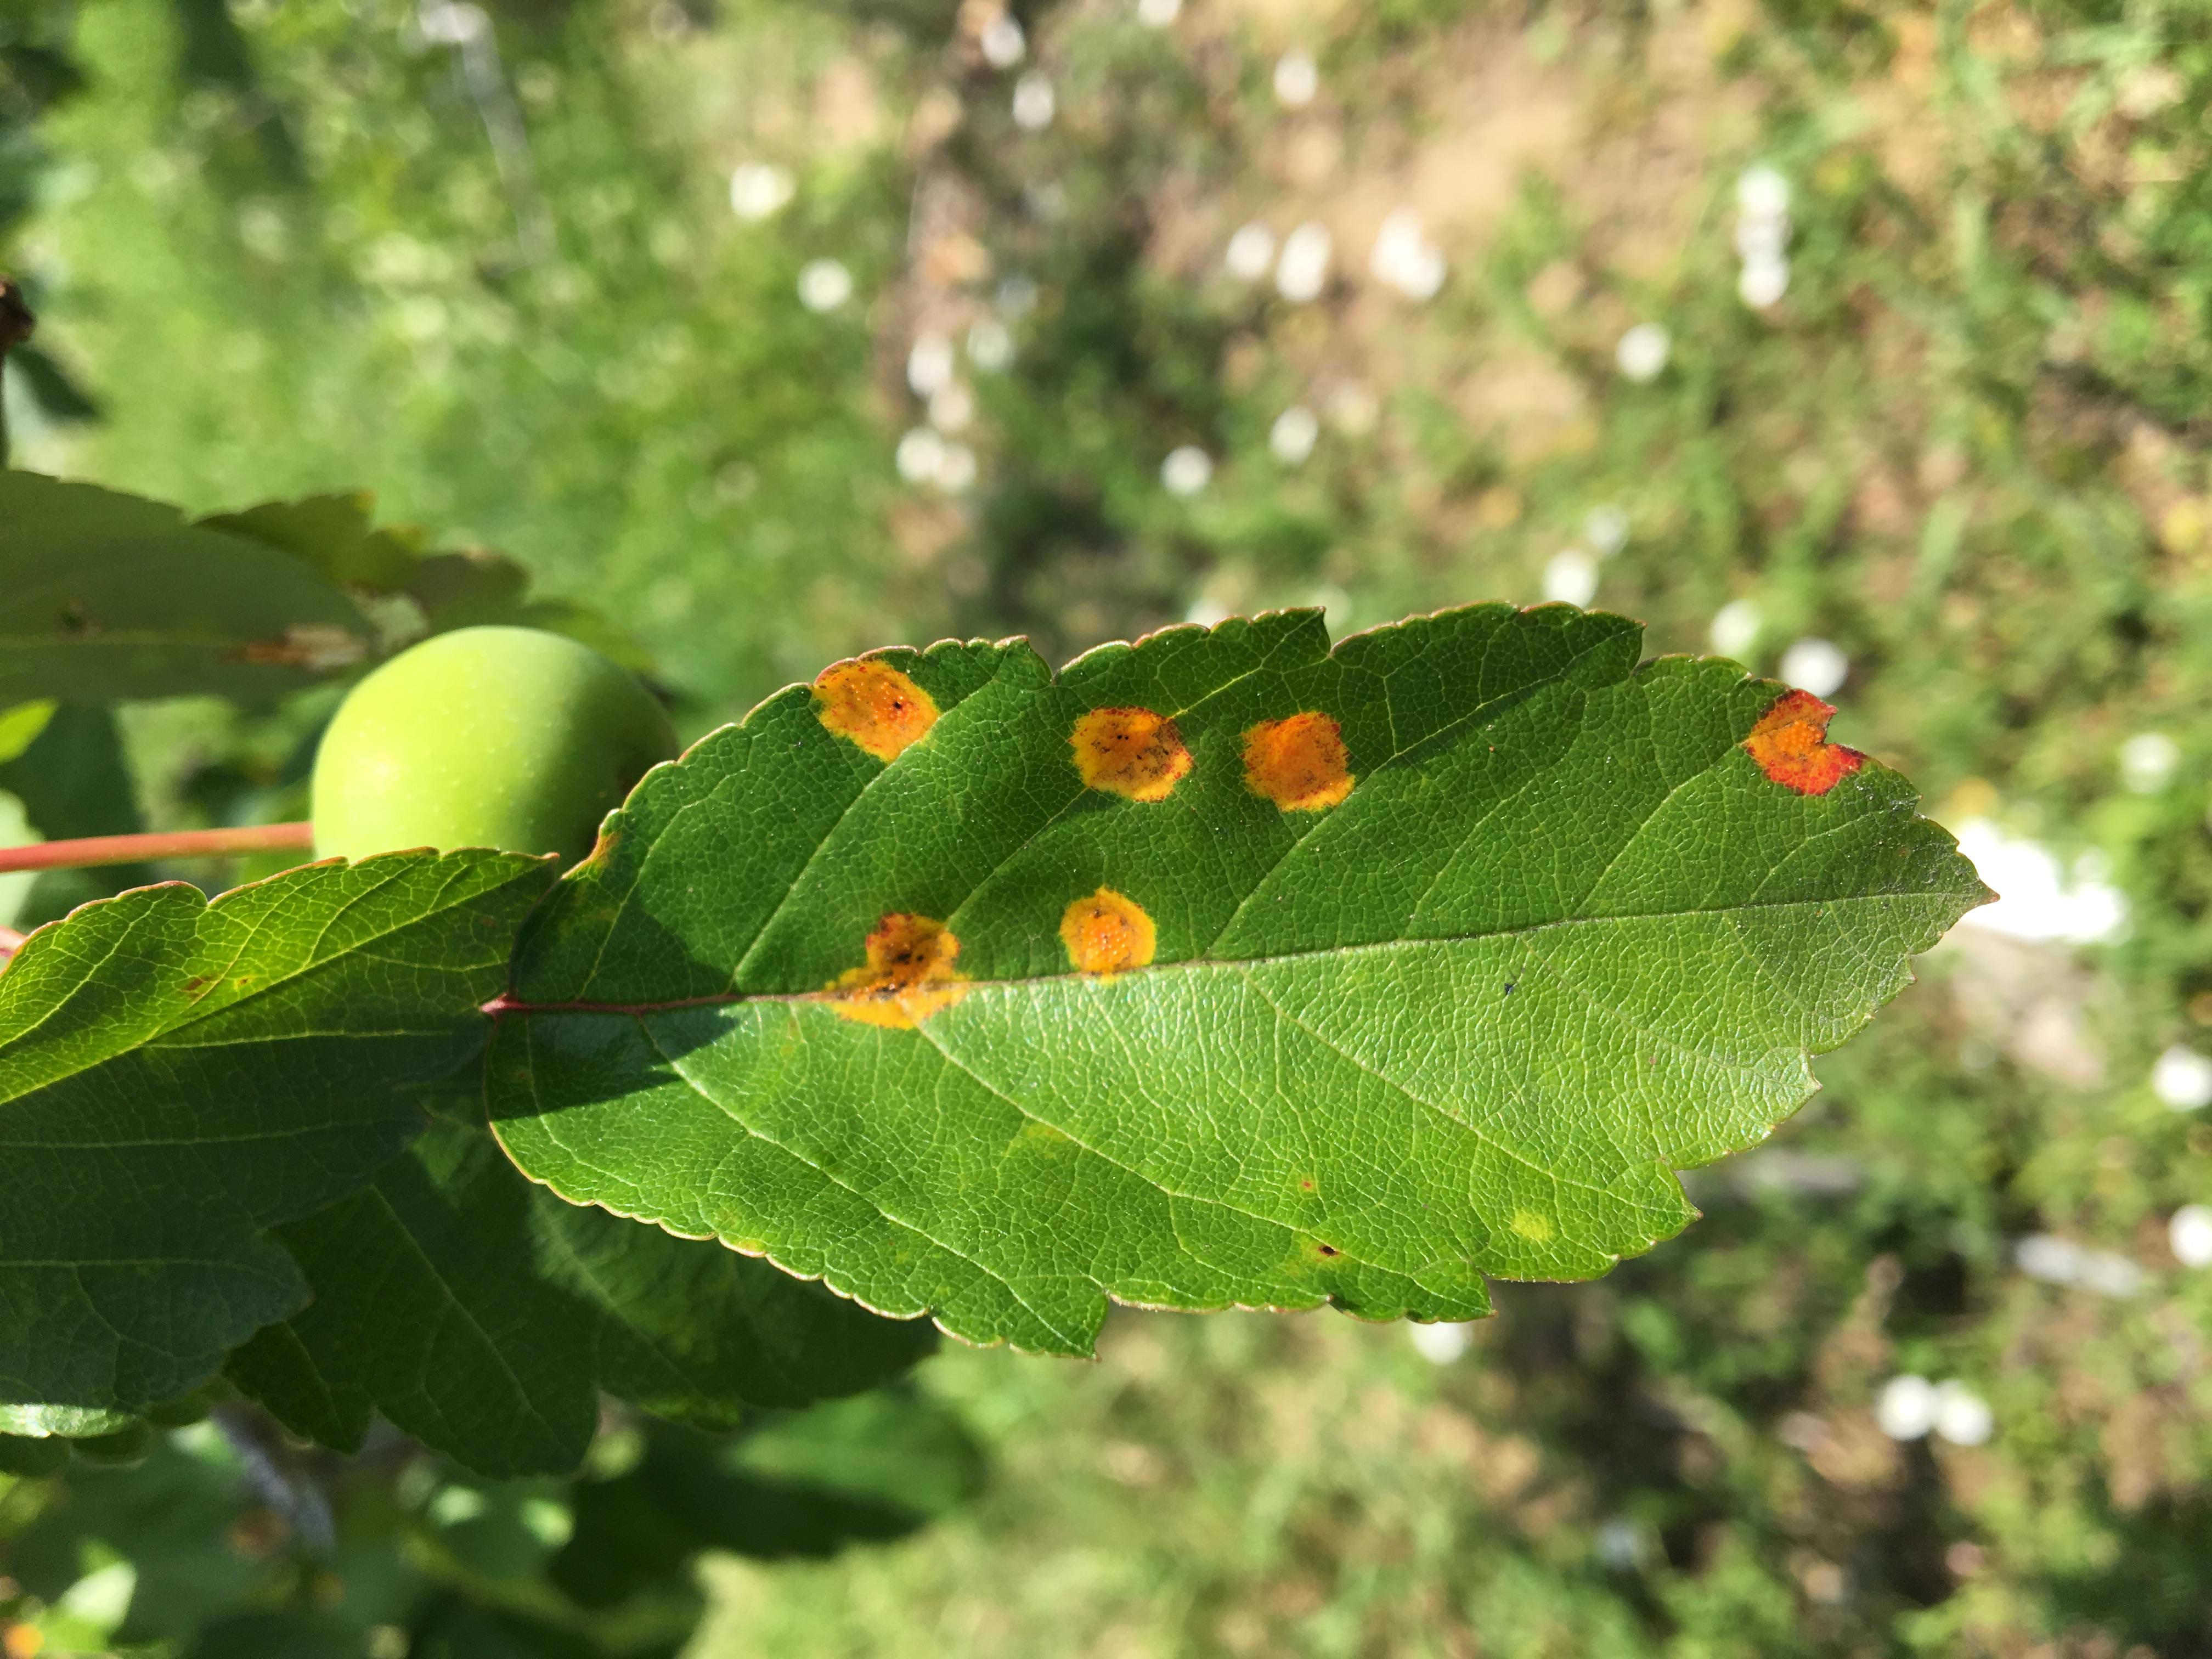

In [7]:
image_path = r"C:\Users\Mamatha TL\Desktop\Tharun\6th sem notes\CGIP\CG Project\CG Mini Project\plant_disease_detection-main\Dataset\Train\Rust\8ae29f9e6c218739.jpg"

with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(r"C:\Users\Mamatha TL\Desktop\Tharun\6th sem notes\CGIP\CG Project\CG Mini Project\plant_disease_detection-main\Dataset\Train",
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(r"C:\Users\Mamatha TL\Desktop\Tharun\6th sem notes\CGIP\CG Project\CG Mini Project\plant_disease_detection-main\Dataset\Validation",
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')



Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#pip install scipy

In [13]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16
                    )

Epoch 1/5
42/42 [==============================] - 645s 13s/step - loss: 1.1300 - accuracy: 0.5242 - val_loss: 0.6836 - val_accuracy: 0.7500
Epoch 2/5
42/42 [==============================] - 399s 10s/step - loss: 0.5797 - accuracy: 0.7428 - val_loss: 0.4851 - val_accuracy: 0.8667
Epoch 3/5
42/42 [==============================] - 490s 12s/step - loss: 0.3829 - accuracy: 0.8533 - val_loss: 0.5352 - val_accuracy: 0.7833
Epoch 4/5
42/42 [==============================] - 417s 10s/step - loss: 0.2639 - accuracy: 0.9183 - val_loss: 0.5166 - val_accuracy: 0.8500
Epoch 5/5
42/42 [==============================] - 463s 11s/step - loss: 0.2089 - accuracy: 0.9319 - val_loss: 0.5920 - val_accuracy: 0.7833


In [14]:
# pip install matplotlib

In [15]:
#pip install seaborn


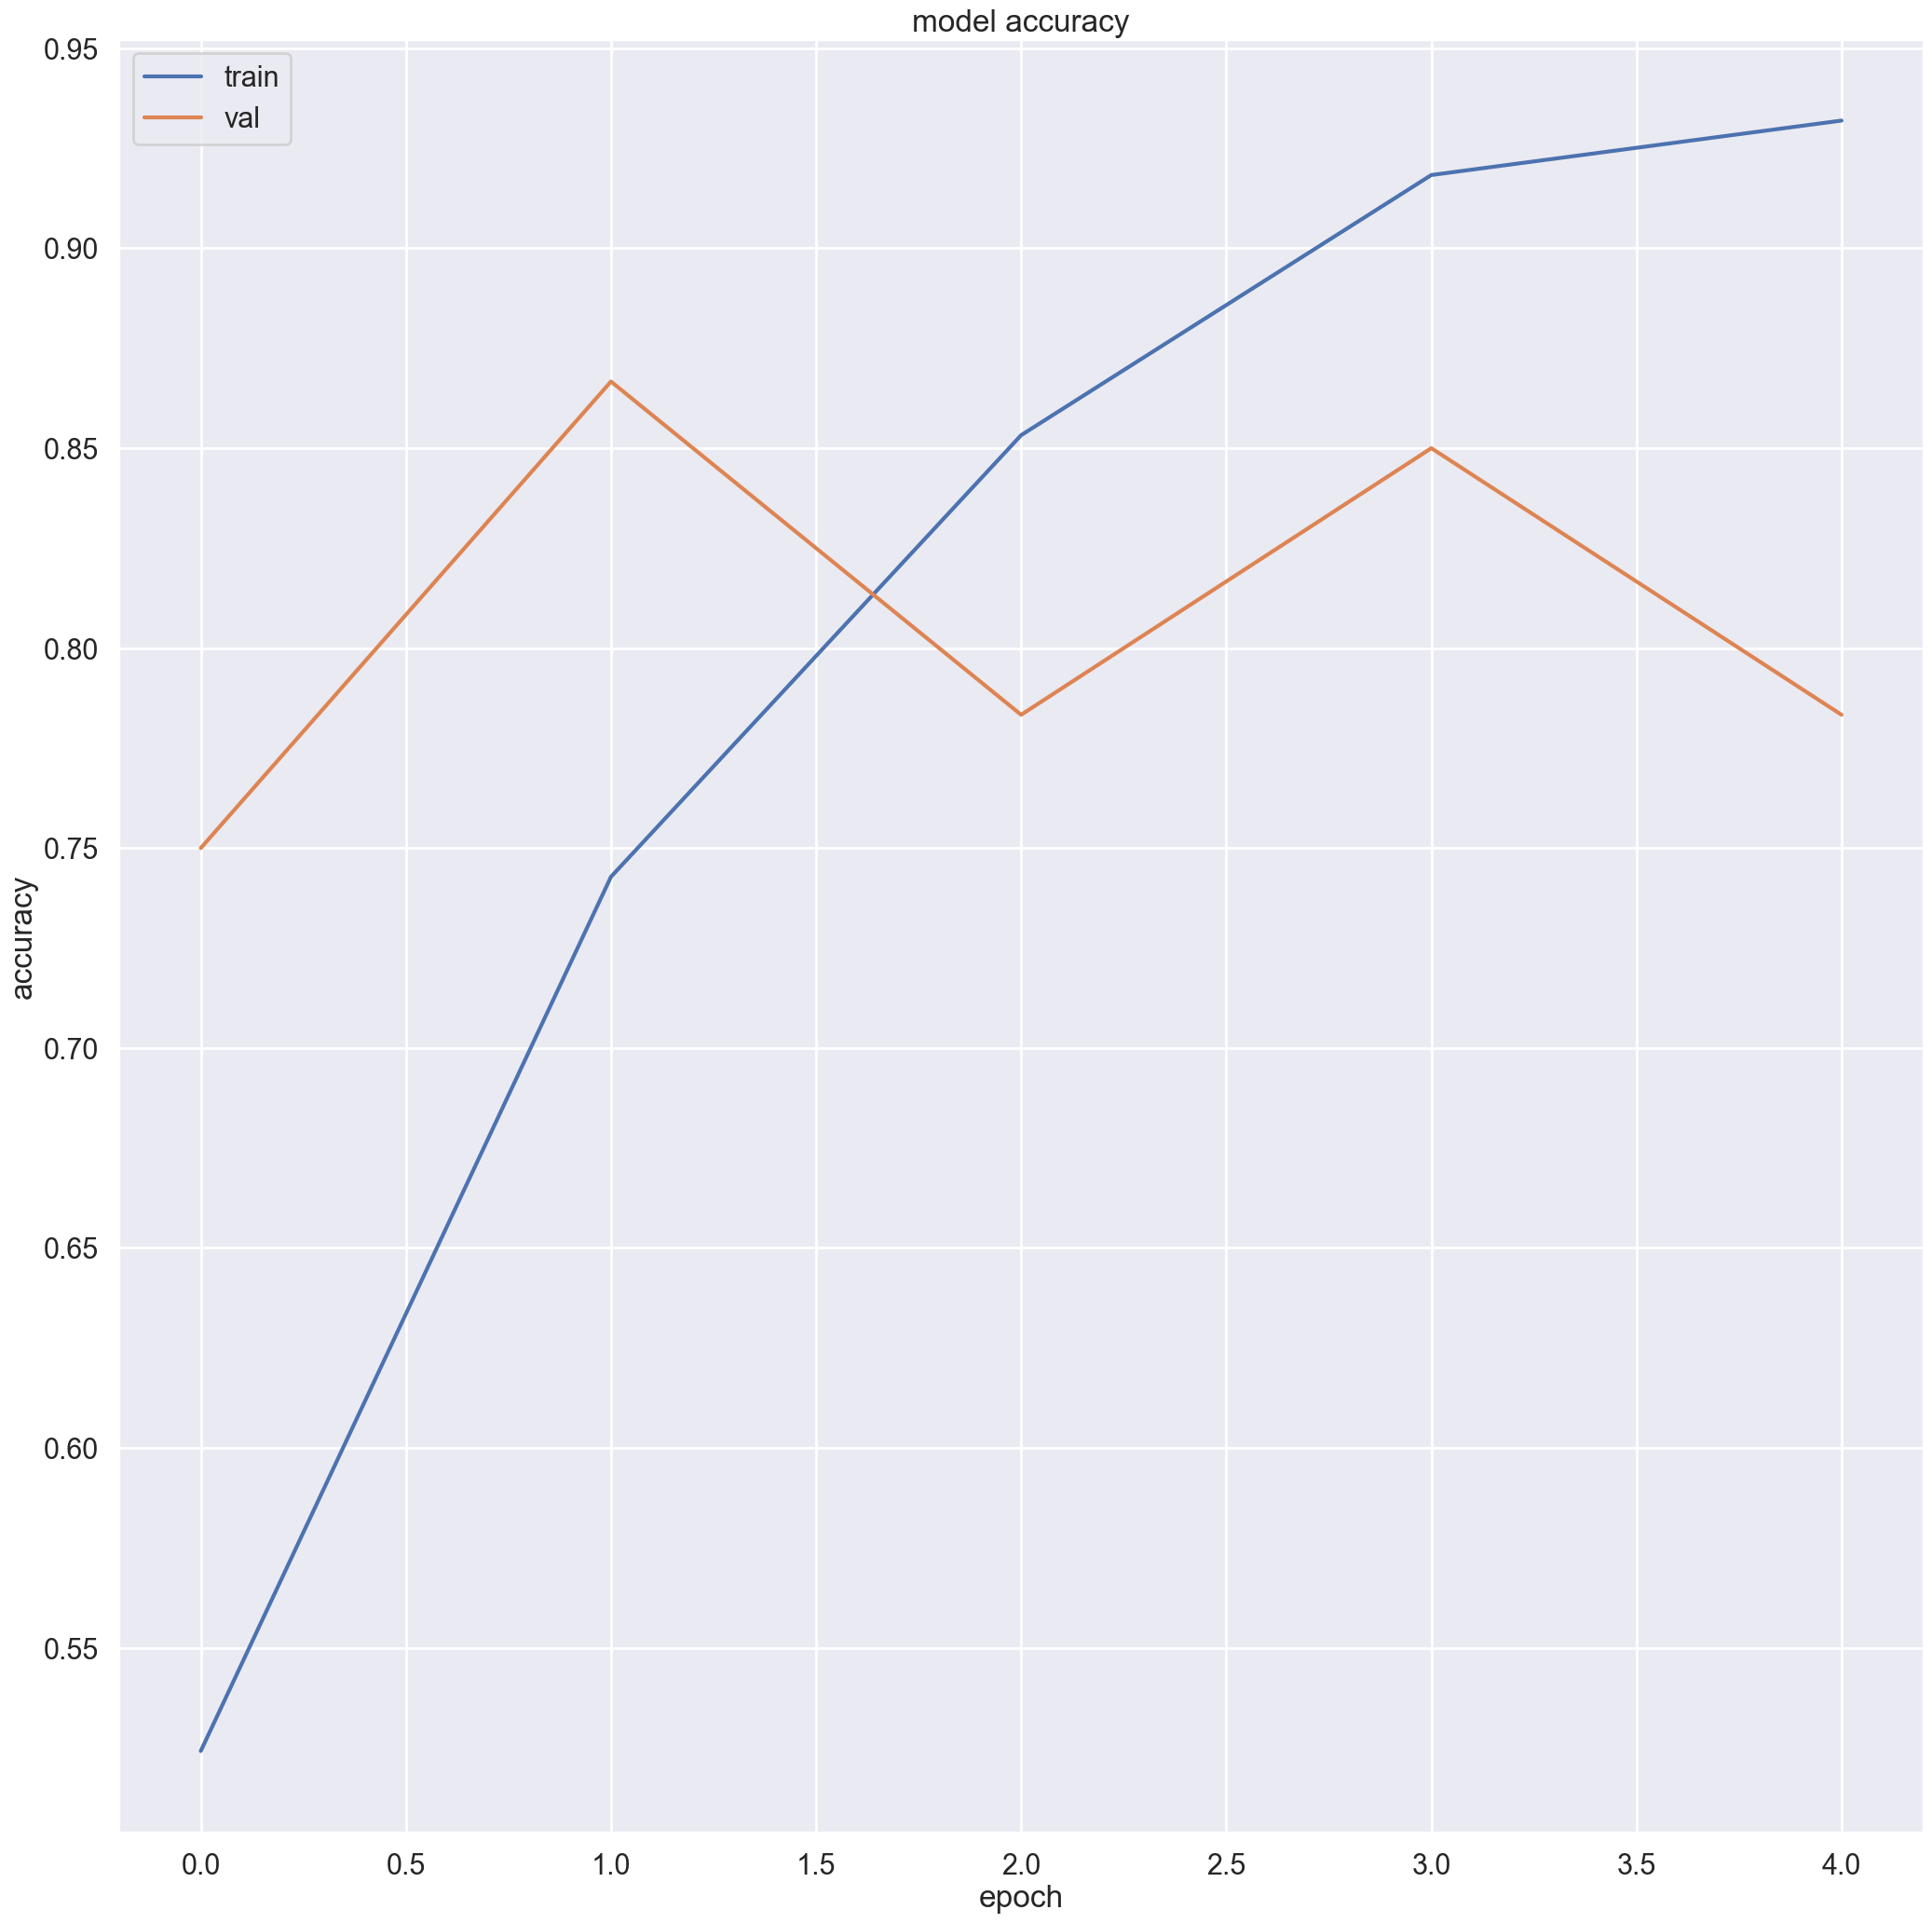

In [16]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
model.save("model.h5")

c:\Users\Mamatha TL\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image(r"C:\Users\Mamatha TL\Desktop\Blueberry-Rust-1.jpg")

In [23]:
predictions = model.predict(x)
predictions[0]

1/1 [==============================] - 0s 483ms/step


array([4.6082834e-14, 5.9581958e-14, 1.0000000e+00], dtype=float32)

In [24]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}

In [25]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Rust
